# Car price prediction based on car model, age and mileage

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [14]:
df=pd.read_csv('carprices.csv')
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


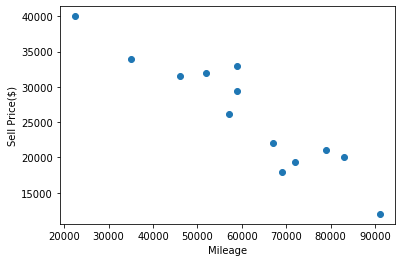

In [9]:
# check for linearity

plt.xlabel('Mileage')
plt.ylabel('Sell Price($)')
plt.scatter(df.Mileage,df['Sell Price($)'])

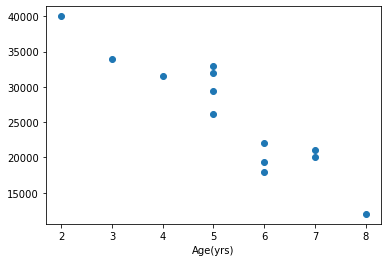

In [10]:
plt.xlabel('Age(yrs)')
plt.scatter(df['Age(yrs)'],df['Sell Price($)'])

### since our data include text information we will use one hot encoding method

In [21]:
# Using pandas to create dummy variables

dummies= pd.get_dummies(df['Car Model'])
new_df= pd.concat([df,dummies],axis='columns')
new_df.drop(['Car Model'],axis='columns',inplace=True)
new_df

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,69000,18000,6,0,1,0
1,35000,34000,3,0,1,0
2,57000,26100,5,0,1,0
3,22500,40000,2,0,1,0
4,46000,31500,4,0,1,0
5,59000,29400,5,1,0,0
6,52000,32000,5,1,0,0
7,72000,19300,6,1,0,0
8,91000,12000,8,1,0,0
9,67000,22000,6,0,0,1


In [22]:
# When you can derive one variable from other variables, they are known to be multi-colinear
# In this situation linear regression won't work as expected, hence we need to drop one column

new_df.drop(['Mercedez Benz C class'],axis='columns',inplace=True)
new_df

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,0


### Model

In [16]:
model= LinearRegression()

X= new_df[['Mileage','Age(yrs)','Audi A5','BMW X5']]
y= new_df['Sell Price($)']

model.fit(X,y)

LinearRegression()

In [18]:
# predict price of a bmw x5 that is 7 yr old with mileage 86000
model.predict([[86000,7,0,1]])

array([11080.74313219])

### Model score

In [20]:
model.score(X,y)

0.9417050937281083